# Aula 04 - Regressão Polinomial

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style='darkgrid')
import random

In [2]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


In [4]:
#Podemos criar atributos a partir de um atributo ja existente?
data_table['Altura^2']=data_table.Altura**2
data_table
#podemos obter um modelo não linear nos dados mas linear nos parametros

,Peso,Altura,Cateter,Altura^2
0,18.140590,1.087122,37.0,1.181835
1,42.403628,1.612903,50.0,2.601457
2,16.099773,0.952502,34.0,0.907260
3,13.605442,1.003302,36.0,1.006615
4,23.582766,1.155702,43.0,1.335648
5,7.709751,0.977902,28.0,0.956292
6,17.460317,1.092202,37.0,1.192906
7,3.854875,0.571501,20.0,0.326614
8,14.965986,0.939802,34.0,0.883228
9,4.308390,0.596901,30.0,0.356291


# Polinomial Regression - Analytics
### Imaginary data

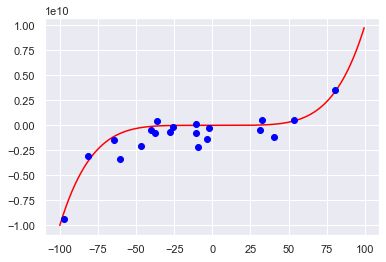

,samples_x,samples_y,result
0,-36.0,4.681361e+08,-6.046618e+07
1,53.5,4.969158e+08,4.382974e+08
2,-26.0,-2.119849e+08,-1.188138e+07
3,-46.5,-2.056315e+09,-2.174026e+08
4,-27.5,-7.076177e+08,-1.572764e+07
5,-37.5,-7.457510e+08,-7.415771e+07
6,-40.5,-4.779317e+08,-1.089620e+08
7,32.5,5.465554e+08,3.625908e+07
8,-9.5,-2.161796e+09,-7.737809e+04
9,40.5,-1.135868e+09,1.089620e+08


In [171]:
samples=20
P_order=5
x=np.arange(-100,100,0.5)
y=x**P_order
c=random.choices(x,k=samples)
yc=list(map(lambda i : i**P_order, c))
noise=np.random.normal(10**4,10**9,samples)
ynoisy=yc+noise
plt.plot(x,y,'-',color='red')
plt.plot(c,ynoisy,'o',color='blue')

plt.show()
poli=pd.DataFrame({'samples_x':c,'samples_y':ynoisy,'result':yc})
poli

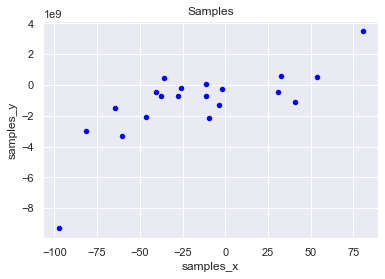

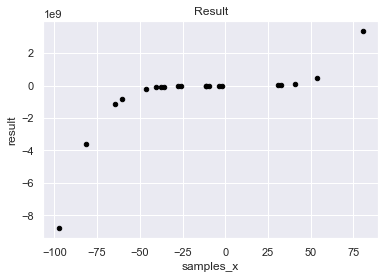

In [172]:
poli.plot('samples_x','samples_y',kind='scatter',color='blue',title='Samples')
poli.plot('samples_x','result',kind='scatter',color='black',title='Result')
plt.show()

In [181]:
poli

,samples_x,samples_y,result
0,-36.0,4.681361e+08,-6.046618e+07
1,53.5,4.969158e+08,4.382974e+08
2,-26.0,-2.119849e+08,-1.188138e+07
3,-46.5,-2.056315e+09,-2.174026e+08
4,-27.5,-7.076177e+08,-1.572764e+07
5,-37.5,-7.457510e+08,-7.415771e+07
6,-40.5,-4.779317e+08,-1.089620e+08
7,32.5,5.465554e+08,3.625908e+07
8,-9.5,-2.161796e+09,-7.737809e+04
9,40.5,-1.135868e+09,1.089620e+08


In [201]:
def poli_x(x, P_order):
    poli_x=[]
    for i in range(P_order+1):
        poli_x.append(x**i)
    return poli_x

In [203]:
x=poli.samples_x
y=poli.result
P_order=2
X=[]
for i in x:
    X.append(poli_x(i,P_order))
np.asanyarray(X)

array([[ 1.00000e+00, -3.60000e+01,  1.29600e+03],
       [ 1.00000e+00,  5.35000e+01,  2.86225e+03],
       [ 1.00000e+00, -2.60000e+01,  6.76000e+02],
       [ 1.00000e+00, -4.65000e+01,  2.16225e+03],
       [ 1.00000e+00, -2.75000e+01,  7.56250e+02],
       [ 1.00000e+00, -3.75000e+01,  1.40625e+03],
       [ 1.00000e+00, -4.05000e+01,  1.64025e+03],
       [ 1.00000e+00,  3.25000e+01,  1.05625e+03],
       [ 1.00000e+00, -9.50000e+00,  9.02500e+01],
       [ 1.00000e+00,  4.05000e+01,  1.64025e+03],
       [ 1.00000e+00, -3.50000e+00,  1.22500e+01],
       [ 1.00000e+00,  8.05000e+01,  6.48025e+03],
       [ 1.00000e+00,  3.10000e+01,  9.61000e+02],
       [ 1.00000e+00, -6.05000e+01,  3.66025e+03],
       [ 1.00000e+00, -1.10000e+01,  1.21000e+02],
       [ 1.00000e+00, -6.45000e+01,  4.16025e+03],
       [ 1.00000e+00, -1.10000e+01,  1.21000e+02],
       [ 1.00000e+00, -2.00000e+00,  4.00000e+00],
       [ 1.00000e+00, -8.15000e+01,  6.64225e+03],
       [ 1.00000e+00, -9.75000e

In [204]:
# adortando parametros
cols=np.shape(X)[1]
W = np.random.rand(cols)
W

array([0.54653995, 0.82361097, 0.85922863])

In [205]:
Y_pred= X@W
Y_pred

array([1.08445685e+03, 2.50393688e+03, 5.59971211e+02, 1.82011574e+03,
       6.27688893e+02, 1.17795139e+03, 1.37654006e+03, 9.34874141e+02,
       7.02676199e+01, 1.44325255e+03, 8.18945231e+00, 5.63486358e+03,
       8.51797197e+02, 3.09570968e+03, 9.54534840e+01, 3.52202956e+03,
       9.54534840e+01, 2.33623254e+00, 5.64063364e+03, 8.08828667e+03])

In [184]:
def W_update():
    E = y - Y_pred

array([0.64925715, 0.01138673, 0.21667324])